<a href="https://colab.research.google.com/github/ldm2060/LearningNote/blob/main/DL%202023.6/week1/%E8%A7%86%E9%A2%91%E7%AC%94%E8%AE%B0/note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK1
## 1.1 基本概念

### 1.1.1 机器学习与深度学习
- 机器学习（Machine Learning）：寻找一个函数来解决一类问题，$f(x) \rightarrow y$
- 深度学习（Deep Learning）：函数是一个类神经网络
 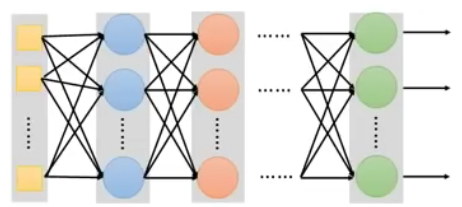

### 1.1.2 有监督和自监督学习
- 有监督学习（Supervised Learning）：预先对训练数据设定了标记
- 自监督学习（Self-supervised Learning）：毋需再预先对海量训练数据进行标记
  - 通过基本的学习任务（Pre-trained / Foundation Model，如BERT）实现对下游任务（Downstream Tasks）的解决

### 1.1.3 生成型对抗网络
生成型对抗网络（Generative Adversarial Networks）：对于$f(x) \rightarrow y$ ，即使没有$x$和$y$的一一对应关系，模型也可以求解出$f$

### 1.1.4 强化学习
强化学习 （Reinforcement Learning）：对某些任务的预标记比较棘手，但可以对结果的好坏进行定义

### 1.1.5 异常检测
异常检测（Anomaly Detection）：使模型拥有回答"我不知道"但能力

### 1.1.6 可解释性AI
可解释性AI（Explainable AI）：模型不光可以得出结果，还能给出为何给出该结果的"理由"

### 1.1.7 模型攻击
模型攻击（Model Attack）：人工对数据的干扰使得模型不能正确识别

### 1.1.8 域适应
域适应（Domain Adaptation）：解决训练和实际求解模型形式上的差异对结果准确度的影响

### 1.1.9 网络压缩
网络压缩（Network Compression）：复杂的模型进行轻量化使得其可以运行在低计算力的设备上

### 1.1.10 元学习
元学习（Meta Learning）：从大量任务中学习出新的任务
实现少样本学习（Few-shot Learning）会经常用到元学习技术

## 1.2 机器学习与深度学习
### 1.2.1 机器学习基本概念
#### 1.2.1.1 问题类别
-  回归问题（Regression）：输出的是数值
- 分类问题（Classification）：给定类别，模型需输出对应的结果
- 结构化学习（Structured Learning）：设计的数据为某种结构（如图片、文章）

#### 1.2.1.2 训练步骤
1.  设计出一个带有未知参数的模型（基于Domain Knowledge，大概就是基于一点微小的经验来选择一个大概适当的模型）
  名词定义：Feature：已知量；Weight：与Feature共同作用的未知量；Bias：直接作用的未知量
1.  定义基于训练数据的损失函数（Loss）
  输入为未知参数（如Weight、Bias）
  输出：指示当前未知量的模型的表现好坏程度
  e.g.  $L=\dfrac{1}{N}\sum ^{N}_{i}\left| y_{i}-\widehat{y}_{i}\right|$，一般越小越好
  MAE：平均绝对差；MSE：平均方差；若 $y、\widehat{y}$ 按概率分布，可考虑交叉熵（Cross Entropy）
1.优化模型：求解 $w^{\ast },b^{\ast}=\arg \min _{w,b}L$
Error Surface：所有的这些Loss绘制出的平面
   梯度下降法（Gradient Descent）：
  1. 随机选择一个初始化的未知参数（如$w_0,b_0$）
  1. 计算 $ \dfrac{\partial L}{\partial w}| _{w=w_{0},b=b_{0}}$，为负增大$w$，为正减少$w$，$ \dfrac{\partial L}{\partial b}| _{w=w_{0},b=b_{0}}$同理。增加或减少的程度为学习率（Learning Rate，自行已设定）（像这种要自己设定的量被称为超参数，Hyperparameters）
  - 缺点：求解出的参数可能只是局部最优（Local Minima），但是不是影响模型优劣的关键因素
1. 将得到的模型的估计值与真实值进行评估，然后优化（如修改超参数或是模型结构）

### 1.2.2 深度学习基本概念
- 线性模型（Linear Models）：模型形似线性函数
- All Piecewise Linear Curves：多个分段函数近似拟合非线性模型
- 采用Sigmoid函数代替分段函数
  \begin{aligned}y=b+wx_{1}\rightarrow y=b+\sum _{i}c_{i}  sigmoid\left( b_{i}+w_{i}x_{1}\right) \end{aligned}
  \begin{aligned}y=b+\sum _{j}w_{j}x_{j}\rightarrow y=b+\sum _{i}c_{i}sigmoid\left( b_{i}+\sum _{j}w_{ij}x_{j}\right) \end{aligned}
  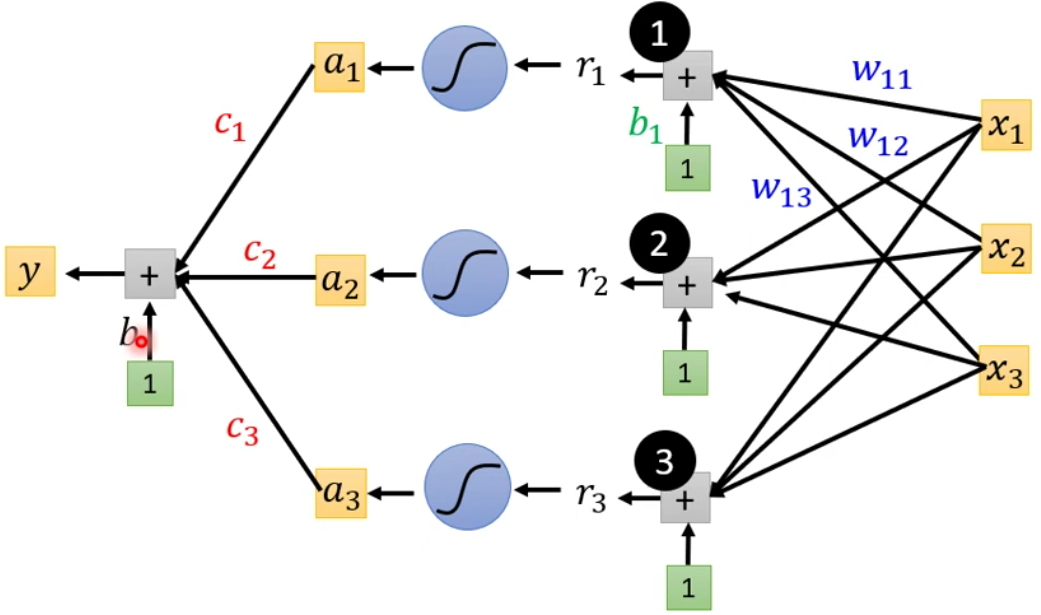
  线性代数方式表达：
  $y=b+c^{T}\sigma \left( b+Wx\right)$
  而后采用梯度下降法寻找最优的参数，偏导形式为矩阵，记作：$\begin{aligned} g=\nabla L\left( \theta ^{0}\right) \end{aligned}$
- 采用ReLU（线性整流函数，Rectified Linear Unit）函数：$C=\max \left( 0,b+wx_{1}\right)$
  2个不同的ReLU叠加可近似Hard Sigmoid
- 像Sigmoid、ReLU这样的函数称为激活函数（Activation Function）
- Neuron：单个函数单元；Hidden Layer：一排Neuron；Deep：Many hidden layers






## 1.3 PyTorch
### 1.3.1 数据类型
Tensor：高维度矩阵

| |  数   | 矩阵  |
|----|  ----  | ----  |
|__32位浮点数__| torch.float   | torch.FloatTensor  |
|__64位有符号整数__| torch.long   | torch.LongTensor  |

### 1.3.2 Tensor操作
定义：



In [10]:
import torch,numpy as np

x = torch.tensor([[1, -1], [-1, 1]])#通过list初始化
print(x)
print('-'*80)
x = torch.from_numpy(np.array([[1, 0], [0, 1]]))#通过numpy初始化
print(x)
print('-'*80)
x = torch.zeros([2, 2])#初始化为zero tensor
print(x)
print('-'*80)
x = torch.ones([1, 2, 5])#初始化为unit tensor
print(x)

tensor([[ 1, -1],
        [-1,  1]])
--------------------------------------------------------------------------------
tensor([[1, 0],
        [0, 1]])
--------------------------------------------------------------------------------
tensor([[0., 0.],
        [0., 0.]])
--------------------------------------------------------------------------------
tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


squeeze：移除指定长度为1的维度

In [16]:
import torch
x = torch.zeros([1, 3, 1])
print(x.shape)
print('-'*80)
x = x.squeeze(2)
print(x.shape)
print('-'*80)
x = torch.zeros([1, 3, 1])
x = x.squeeze(0)
print(x.shape)
print('-'*80)
x = torch.zeros([2, 3, 1])
x = x.squeeze(0)
print(x.shape)

torch.Size([1, 3, 1])
--------------------------------------------------------------------------------
torch.Size([1, 3])
--------------------------------------------------------------------------------
torch.Size([3, 1])
--------------------------------------------------------------------------------
torch.Size([2, 3, 1])


unsqueeze：指定位置扩展一个维度，维数为1

In [15]:
import torch
x = torch.zeros([2, 3, 2])
print(x.shape)
print('-'*80)
x = x.unsqueeze(2)
print(x.shape)

torch.Size([2, 3, 2])
--------------------------------------------------------------------------------
torch.Size([2, 3, 1, 2])


transpose：转置两个指定的维度

In [18]:
import torch
x = torch.zeros([2, 3, 4])
print(x.shape)
print('-'*80)
x = x.transpose(1,2)
print(x.shape)

torch.Size([2, 3, 4])
--------------------------------------------------------------------------------
torch.Size([2, 4, 3])


cat：连接多个tensor

In [19]:
import torch
x = torch.zeros([2, 3, 4])
y = torch.zeros([2, 1, 4])
z = torch.zeros([2, 2, 4])
w = torch.cat([x, y, z], dim = 1)
w.shape

torch.Size([2, 6, 4])

其他运算

In [30]:
import torch
x =  torch.tensor([[1, 2], [2, 1]])
y = torch.ones([2, 2])
print(x+y)
print('-'*80)
print(x-y)
print('-'*80)
print(x.pow(2))
print('-'*80)
print(x.sum())
print('-'*80)
print(y.mean())

tensor([[2., 3.],
        [3., 2.]])
--------------------------------------------------------------------------------
tensor([[0., 1.],
        [1., 0.]])
--------------------------------------------------------------------------------
tensor([[1, 4],
        [4, 1]])
--------------------------------------------------------------------------------
tensor(6)
--------------------------------------------------------------------------------
tensor(1.)


切换计算平台

In [31]:
import torch
print(torch.cuda.is_available())
x = torch.zeros([2, 3, 4])
x = x.to("cpu")
x = x.to("cuda")

False


RuntimeError: ignored

计算梯度
注：
- Only Tensors of floating point and complex dtype can require gradients
- requires_grad = True 必需

下面例子的说明：$\begin{aligned}z=\sum _{i}\sum _{j}x_{ij}^{2} \end{aligned}$,则$ \begin{aligned}\dfrac{\partial z}{\partial x_{i,j}}=2x_{ij}\end{aligned}$

In [3]:
import torch
x = torch.tensor([[1., 0], [-1., 1.]], requires_grad = True)
z = x.pow(2).sum()
z.backward()
x.grad

tensor([[ 2.,  0.],
        [-2.,  2.]])